<a href="https://colab.research.google.com/github/bramvandeurzen934/Group16_ECG/blob/test-integratie-google-colab/assignment_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [ ]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git

import zipfile
import os
import pandas as pd

with zipfile.ZipFile('/content/tm10007_ml/ecg/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

In [5]:
data.head()

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,11_741,11_742,11_743,11_744,11_745,11_746,11_747,11_748,11_749,label
0,47.685046,48.416904,37.371002,61.604757,58.732738,213.067966,120.890451,40.100639,19.106303,6.043738,...,0.078753,0.379885,0.182930,0.231552,0.222432,0.154919,0.158616,0.269249,0.112248,0
1,152.726718,297.353726,111.168880,25.419423,14.636085,24.609688,49.533842,253.651571,483.852043,167.617409,...,0.804160,0.809705,0.830032,0.774368,0.798178,0.853519,0.827946,0.859936,0.742673,1
2,1.601260,3.882169,22.978997,21.673040,8.919484,18.329286,27.710604,23.350084,37.896254,8.331180,...,0.156080,0.102070,0.168276,0.120385,0.064254,0.077670,0.059857,0.098506,0.098288,0
3,1.388947,3.052483,3.084103,4.627886,10.016196,15.020347,139.823127,20.149108,10.393109,9.241921,...,0.238274,0.096733,0.030739,0.170214,0.052079,0.179360,0.226222,0.092000,0.192559,0
4,3.625561,3.728466,6.205367,17.722897,5.699401,9.024836,15.782812,33.336480,55.257804,19.139128,...,0.056914,0.059116,0.050098,0.152588,0.129712,0.047342,0.058446,0.141610,0.129477,0


### Exploration data

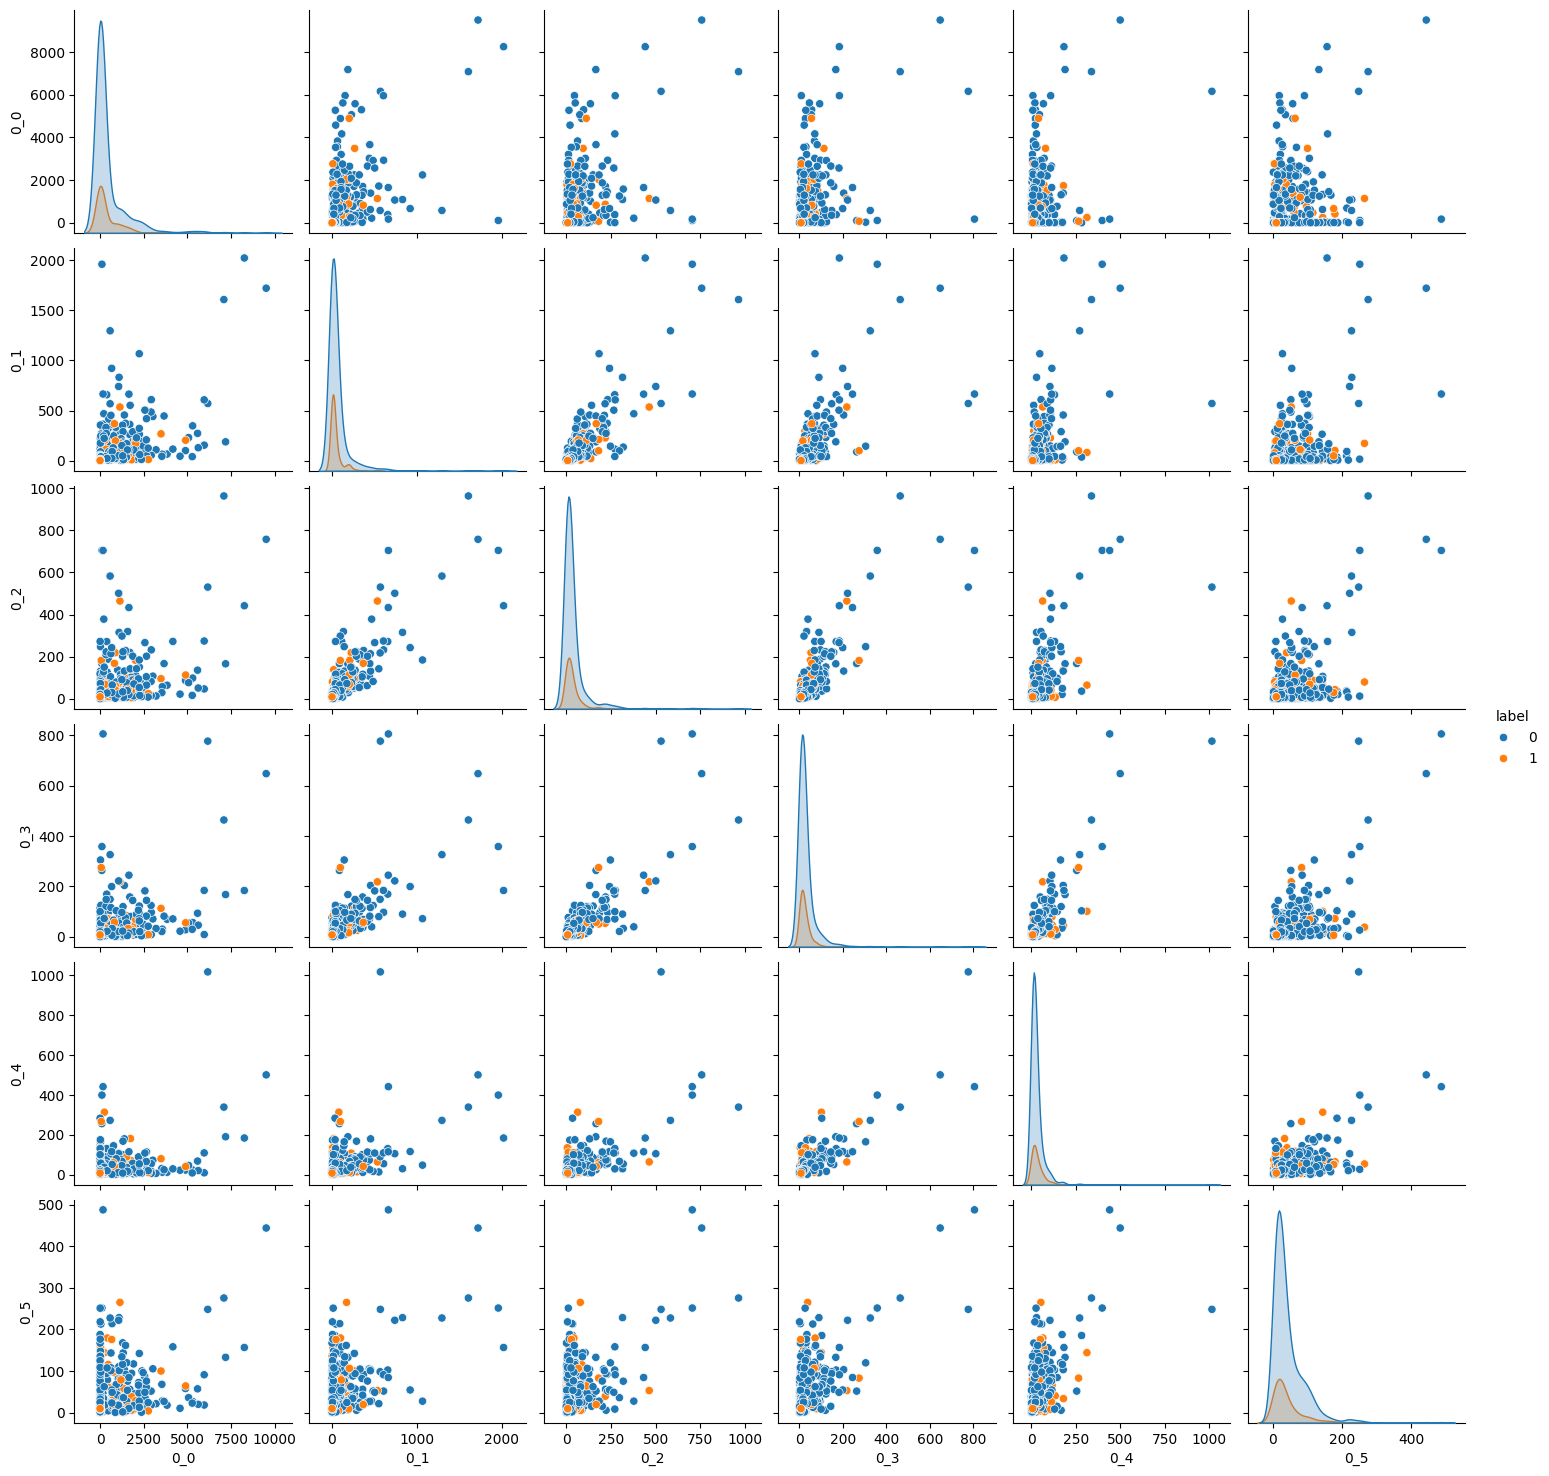

In [52]:
import seaborn as sns

subset_features = ['0_0','0_1','0_2','0_3','0_4','0_5']
data_subset = data[subset_features + ['label']]

sns.pairplot(data_subset, hue = 'label',diag_kind = 'kde')

In [17]:
# number of missing values
print('Number missing values:',data.isna().sum().sum())
# number of duplicates
print('Number of duplicates:', data.duplicated().sum())


Number missing values: 0
Number of duplicates: 0


In [39]:
# number of unique
print('columns with unique values < 50: \n',data.loc[:,data.nunique()<50])
# datatype
print('datatype is not float: \n',data.loc[:,data.dtypes != 'float64'])

columns with unique values < 50: 
      label
0        0
1        1
2        0
3        0
4        0
..     ...
822      0
823      0
824      0
825      0
826      1

[827 rows x 1 columns]


<Axes: ylabel='label'>

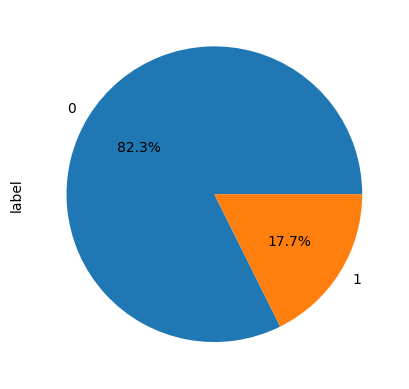

In [51]:
data['label'].value_counts().plot.pie(autopct='%1.1f%%')